In [132]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
oly = pd.read_csv("oly.csv")

In [3]:
oly.head()

,Unnamed: 0,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,...,value_type,medal,year,game_end_date,game_start_date,game_location,game_name,game_season,game_year,country
0,0,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,GOLD,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",False,1,Spain,...,NaN,True,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Spain
1,1,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,SILVER,"[('Alessandra PERILLI', 'https://olympics.com/...",False,2,San Marino,...,NaN,True,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,San Marino
2,2,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,BRONZE,"[('Madelynn Ann BERNAU', 'https://olympics.com...",False,3,United States of America,...,NaN,True,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,United States
3,3,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Zuzana STEFECEKOVA', 'https://olympics.com/...",False,4,Slovakia,...,NaN,False,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Slovakia
4,4,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Yukie NAKAYAMA', 'https://olympics.com/en/a...",False,5,Japan,...,NaN,False,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Japan


In [85]:
gdp = pd.read_csv("gdp.csv", header = 2)

In [10]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.934248e+10,1.975349e+10,2.152662e+10,2.577236e+10,2.356323e+10,2.685135e+10,...,9.155904e+11,9.300864e+11,9.588248e+11,8.954401e+11,8.569919e+11,9.647907e+11,9.866107e+11,9.803716e+11,9.008286e+11,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040732e+10,1.113130e+10,1.194684e+10,1.268022e+10,1.384262e+10,1.486682e+10,...,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10,NaN


In [11]:
gdp["Country Name"].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Alge

In [48]:

def sum_medals_by_country_year(df):
    oly = df
    years = np.array(['2020', '2018', '2016', '2014', '2012', '2010', '2008', '2006',
           '2004', '2002', '2000', '1998', '1996', '1994', '1992', '1988'])
    oly_tot = oly[oly['year']==2020].groupby('country')[['medal']].sum()

    for year in years:
        oly_tot[year + "_mc"] = oly[oly['year'] == int(year)].groupby('country')[['medal']].sum()
    
    oly_tot = oly_tot.drop(['medal'], axis = 1)
    
    oly_tot = oly_tot.reset_index()
    
    return oly_tot

In [113]:
oly_tot = sum_medals_by_country_year(oly)

In [54]:
oly_tot[oly_tot["country"] == "United States"]

,country,2020_mc,2018_mc,2016_mc,2014_mc,2012_mc,2010_mc,2008_mc,2006_mc,2004_mc,2002_mc,2000_mc,1998_mc,1996_mc,1994_mc,1992_mc,1988_mc
179,United States,113,23.0,121.0,28.0,104.0,37.0,112.0,25.0,101.0,34.0,93.0,13.0,101.0,13.0,119.0,100.0


In [52]:
oly_tot.head()

,country,2020_mc,2018_mc,2016_mc,2014_mc,2012_mc,2010_mc,2008_mc,2006_mc,2004_mc,2002_mc,2000_mc,1998_mc,1996_mc,1994_mc,1992_mc,1988_mc
0,Afghanistan,0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0
1,Albania,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,Algeria,0,NaN,2.0,NaN,1.0,0.0,2.0,0.0,0.0,NaN,5.0,NaN,3.0,NaN,2.0,0.0
3,American Samoa,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
4,Andorra,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
set1 = set(oly['country'])
set2 = set(gdp['Country Name'])

intersection = set1.intersection(set2)
difference = set1.symmetric_difference(set2)

In [70]:
len(intersection)

176

In [72]:
len(difference)

133

In [73]:
difference

{'Africa Eastern and Southern',
 'Africa Western and Central',
 'Arab World',
 'Bahamas',
 'Bahamas, The',
 'Brunei',
 'Brunei Darussalam',
 'Cabo Verde',
 'Cape Verde',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'Channel Islands',
 'Chinese Taipei',
 'Congo',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Cook Islands',
 "Cote d'Ivoire",
 'Curacao',
 'Czechoslovakia',
 "Côte d'Ivoire",
 'Democratic Republic of Timor-Leste',
 'Democratic Republic of the Congo',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Egypt',
 'Egypt, Arab Rep.',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Faroe Islands',
 'Federated States of Micronesia',
 'Fragile and conflict affected situations',
 'French Polynesia',
 'Gambia',
 'Gambia, The',
 'Gibraltar',
 'Great Britain',
 'Gre

In [74]:
intersection

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 '

In [75]:
set1

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Chinese Taipei',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 "Côte d'Ivoire",
 'Democratic Republic of Timor-Leste',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fe

In [76]:
set2

{'Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',

In [77]:
def recode_countries(name):
    if name == "Egypt, Arab Rep.":
        return "Egypt"
    elif name == "United Kingdom":
        return "Great Britain"
    elif name == "Hong Kong SAR, China":
        return "Hong Kong, China"
    elif name == "Iran, Islamic Rep.":
        return "Islamic Republic of Iran"
    elif name == "Cote d'Ivoire":
        return "Ivory Coast"
    elif name == "Korea, Rep.":
        return "South Korea"
    elif name == "Kyrgyz Republic":
        return "Kyrgyzstan"
    elif name == "Moldova":
        return "Republic of Moldova"
    elif name == "Russian Federation":
        return "Russia"
    elif name == "Slovak Republic":
        return "Slovakia"
    elif name == "Tanzania":
        return "United Republic of Tanzania"
    elif name == "Venezuela, RB":
        return "Venezuela"
    elif name == "Virgin Islands (U.S.)":
        return "Virgin Islands, US"
    else:
        return name

In [109]:
def merge_oly_gdp(df1, df2):
    oly_tot = df1
    gdp = df2

    #recode gdp country names    
    gdp["country_test"] = gdp["Country Name"].apply(recode_countries)
    gdp = gdp.rename(columns={"country_test":"country"})
    
    oly_tot = pd.merge(oly_tot, gdp, how="left", on= "country")
    oly_tot.drop(oly_tot.columns[range(17,49)],
                 axis = 1, inplace = True)
    oly_tot.drop(oly_tot.columns[range(18,52,2)],
                 axis = 1, inplace = True)
    
    return oly_tot

In [114]:
olygdp = merge_oly_gdp(oly_tot, gdp)
olygdp.columns

Index(['country', '2020_mc', '2018_mc', '2016_mc', '2014_mc', '2012_mc',
       '2010_mc', '2008_mc', '2006_mc', '2004_mc', '2002_mc', '2000_mc',
       '1998_mc', '1996_mc', '1994_mc', '1992_mc', '1988_mc', '1988', '1990',
       '1992', '1994', '1996', '1998', '2000', '2002', '2004', '2006', '2008',
       '2010', '2012', '2014', '2016', '2018', '2020'],
      dtype='object')

In [115]:
olygdp.head()

,country,2020_mc,2018_mc,2016_mc,2014_mc,2012_mc,2010_mc,2008_mc,2006_mc,2004_mc,...,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Afghanistan,0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,...,4.055180e+09,5.226779e+09,6.971286e+09,1.010923e+10,1.585657e+10,2.000160e+10,2.048489e+10,1.801775e+10,1.835388e+10,1.980707e+10
1,Albania,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.348070e+09,7.184681e+09,8.896074e+09,1.288135e+10,1.192693e+10,1.231983e+10,1.322814e+10,1.186120e+10,1.514702e+10,1.479962e+10
2,Algeria,0,NaN,2.0,NaN,1.0,0.0,2.0,0.0,0.0,...,5.676032e+10,8.533258e+10,1.170273e+11,1.710007e+11,1.612073e+11,2.090590e+11,2.138100e+11,1.600342e+11,1.754150e+11,1.451639e+11
3,American Samoa,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,5.120000e+08,5.090000e+08,4.930000e+08,5.600000e+08,5.730000e+08,6.400000e+08,6.430000e+08,6.710000e+08,6.410000e+08,NaN
4,Andorra,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.755910e+09,2.894922e+09,3.456442e+09,4.085631e+09,3.449967e+09,3.188809e+09,3.271808e+09,2.896679e+09,3.218316e+09,NaN


In [116]:
olygdp.shape

(190, 34)

In [124]:
olygdp[olygdp["country"] == "United States"]

,country,2020_mc,2018_mc,2016_mc,2014_mc,2012_mc,2010_mc,2008_mc,2006_mc,2004_mc,...,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
179,United States,113,23.0,121.0,28.0,104.0,37.0,112.0,25.0,101.0,...,1.093642e+13,1.221373e+13,1.381461e+13,1.471284e+13,1.499205e+13,1.619701e+13,1.752716e+13,1.874508e+13,2.061186e+13,2.093660e+13


0      Text(19807067268.1084, 0, 'Afghanistan')
1          Text(14799615097.1008, 0, 'Albania')
2          Text(145163902228.168, 0, 'Algeria')
3                Text(nan, 0, 'American Samoa')
4                       Text(nan, 0, 'Andorra')
                         ...                   
185     Text(nan, 0, 'Virgin Islands, British')
186          Text(nan, 0, 'Virgin Islands, US')
187                       Text(nan, 0, 'Yemen')
188          Text(19320053859.279, 0, 'Zambia')
189       Text(16768513442.6415, 0, 'Zimbabwe')
Length: 190, dtype: object

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

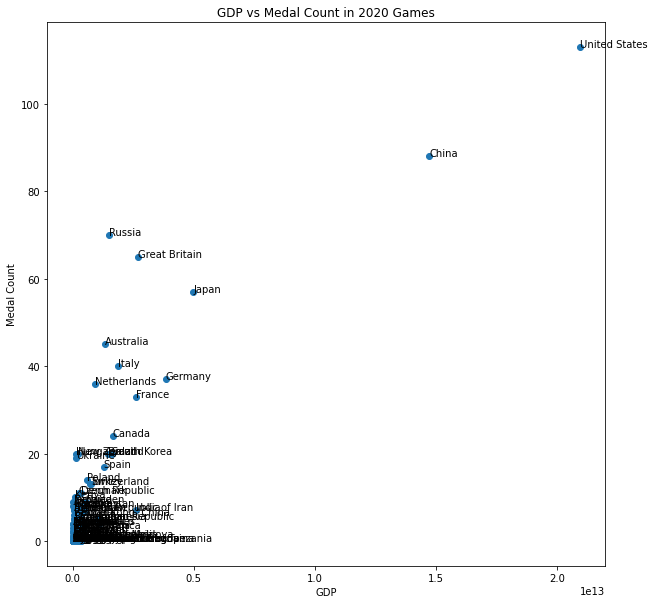

In [144]:
fig, ax = plt.subplots(1, figsize = (10,10))
ax.scatter(olygdp["2020"], olygdp["2020_mc"])
plt.title("GDP vs Medal Count in 2020 Games")
plt.xlabel("GDP")
plt.ylabel("Medal Count")

olygdp[['2020','2020_mc','country']].apply(lambda x: ax.text(*x),axis=1)